Summarizing across multiple data frames with Xarray
============================

The problem: Experimental data from a series of readings from a plate is contained in a set of [Pandas](http://pandas.pydata.org/) dataframes. For each of 4 wells (A, B, C and D) on the plate, there is a mean and sem value. There are 4 readings from the plate. We want to be able to analyse data from each well. The question is how to deal with this 3-D data set using [Xarray](http://xarray.pydata.org/en/stable/), which is now considered to be the N-dimensional version of Pandas and replaces the Panel data structure that Pandas previously used for 3d data.

We'll start by creating some mock data where each experiment is in a dataframe and the dataframes are in a list called `data`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

data = list()
for i in range(4):
    mean = (i+1)*np.arange(1, 5)
    sem = np.ones(4)
    df = pd.DataFrame(None, index=['A', 'B', 'C', 'D'])
    df['mean'] = mean
    df['sem'] = sem
    data.append(df)

What we are going to do is to convert the dataframes to Xarray DataArrays. Then we will use the `concat` function to combine into a single DataArray. Once the data is in a single DataArray, we can access whichever subset of the data we wish using dictionaries. For this demonstration, we will just plot the data.

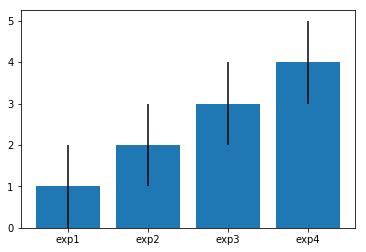

In [2]:
exp_list = list()
labels = list()
for i, df in enumerate(data):
    array = xr.DataArray(df, dims=['well', 'param'])
    exp_list.append(array)
    labels.append('exp'+str(i+1))

combined = xr.concat(exp_list, dim=pd.Index(labels, name='exp'))
mean = combined.loc[dict(well='A', param='mean')]
sem = combined.loc[dict(well='A', param='sem')]
plt.bar(range(len(mean)), mean, yerr=sem, tick_label=labels)
plt.show()